# **11장 차원축소, 잠재공간, 오토인코더**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB 11.1 3차원 공간의 데이터에서 주성분을 찾아보자**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) / np.sqrt(2)

# 1000개의 데이터 셋 생성하기
n_data = 1000
X = []
for _ in range(n_data) :
    r_coeff = np.random.randn(2,)
    data = 2.0* r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)
    X.append(data)

X = np.array(X)

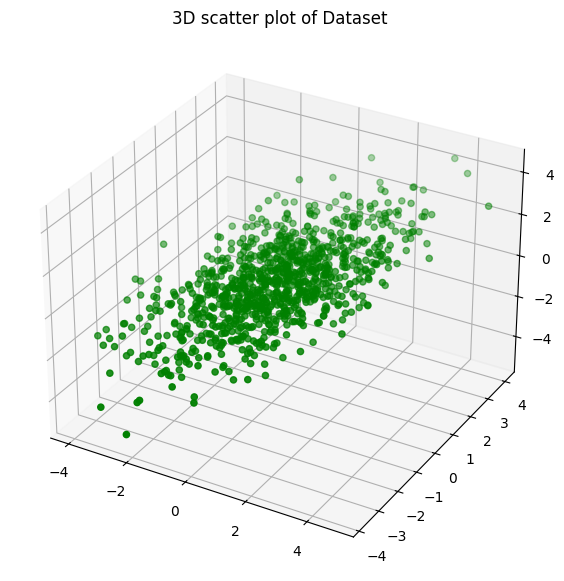

In [4]:
# 가시화를 위한 맷플롯립 figure 만들기
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# 3차원 공간에 데이터 가시화
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green")
plt.title("3D scatter plot of Dataset")
plt.show()

In [5]:
X_adj = X - X.mean(axis = 0)    # 평균을 빼서 데이터 중심을 원점으로 옮김
U, S, Vt = np.linalg.svd(X_adj) # 특이값 분해를 실행함
Vt.T                            # 주성분을 담고 있는 행렬

array([[ 5.78329819e-01, -7.06257072e-01,  4.08332670e-01],
       [ 5.77064084e-01,  3.51952353e-04, -8.16698793e-01],
       [ 5.76655585e-01,  7.07955383e-01,  4.07759135e-01]])

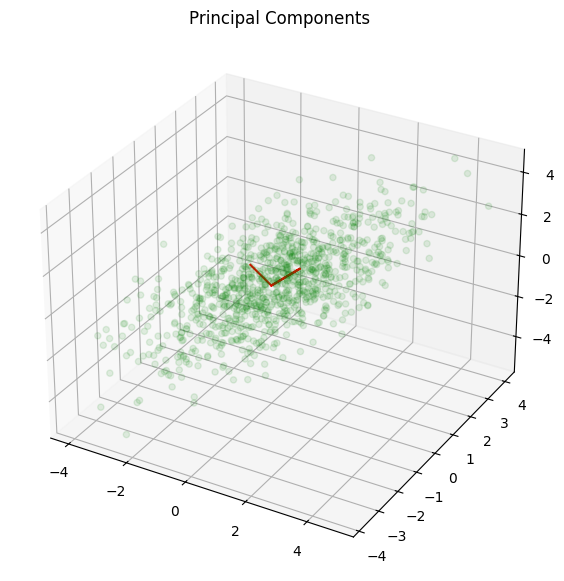

In [6]:
ig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green", alpha=0.1)
plt.title("Principal Components")
origin = np.zeros((1,3))

# 주성분을 나타내는 벡터를 그리기 위한 좌표 생성
C = np.concatenate( (origin, Vt[0, :].reshape(-1,3),
                   origin, Vt[1, :].reshape(-1,3)), axis =0)
# 주성분 그리기
ax.plot3D(C[:,0], C[:,1], C[:,2], color = "red")
plt.show()

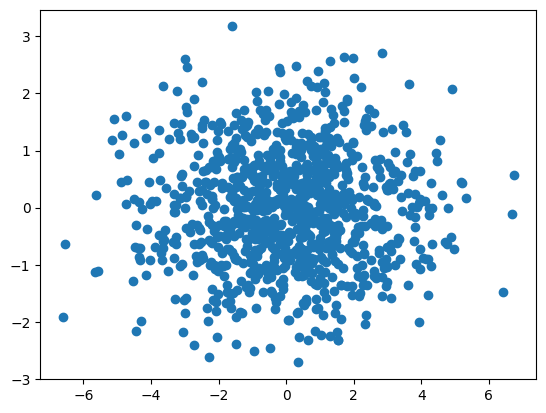

In [7]:
W_2d = Vt.T[:, :2]
X_2d = X_adj.dot(W_2d)
plt.scatter(X_2d[:, 0], X_2d[:, 1])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

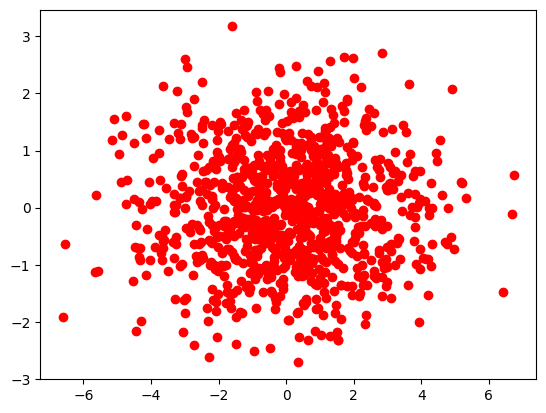

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_2d_sklearn = pca.fit_transform(X)
plt.scatter(X_2d_sklearn[:, 0], X_2d_sklearn[:, 1], color='r')
plt.show()